In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

importing data

In [24]:
import pandas_datareader as pdr
import datetime

In [25]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 1, 1)
tesla = pdr.DataReader("TSLA", 'yahoo', start, end)
bmw = pdr.DataReader("BMWYY", 'yahoo', start, end)
ford = pdr.DataReader("F", 'yahoo', start, end)
gm = pdr.DataReader("GM", 'yahoo', start, end)
honda = pdr.DataReader("HMC", 'yahoo', start, end)
hyundai = pdr.DataReader("HYMTF", 'yahoo', start, end)

In [30]:
hyundai.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,25.25,25.250000,25.250000,25.25,0.0,19.999969
2012-01-04,28.35,27.799999,27.799999,28.35,300.0,22.455410
2012-01-05,28.50,28.350000,28.350000,28.50,300.0,22.574221
2012-01-06,28.50,28.500000,28.500000,28.50,0.0,22.574221
2012-01-09,28.75,28.750000,28.750000,28.75,300.0,22.772243


In [31]:
hyundai.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,43.694753,43.544452,43.627581,43.614537,1055.366269,37.958189
std,11.160786,11.146660,11.140095,11.165412,4315.834468,9.274007
min,25.250000,25.250000,25.250000,25.250000,0.000000,19.999969
25%,35.540001,35.540001,35.540001,35.540001,0.000000,32.762581
50%,41.709999,41.599998,41.650002,41.700001,100.000000,38.435135
75%,48.950001,48.549999,48.950001,48.950001,700.000000,42.930958
max,80.000000,78.800003,78.800003,80.000000,97900.000000,66.212921


Visualizing Open Prices

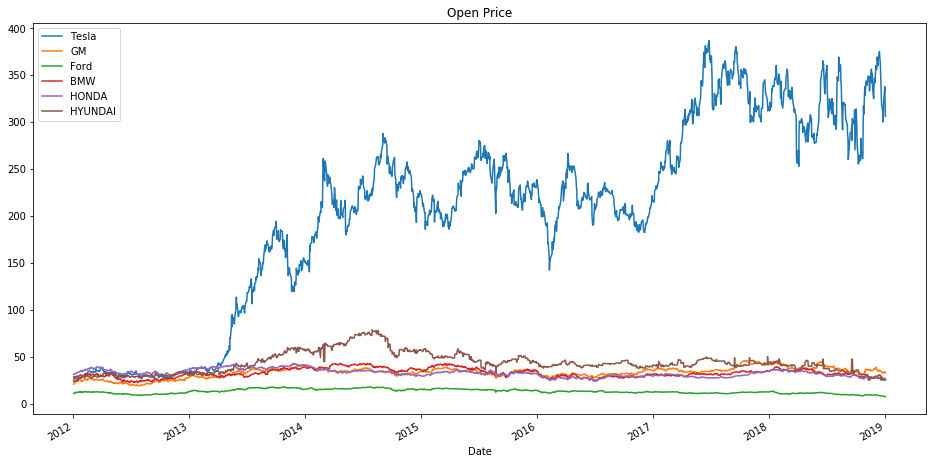

In [32]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
bmw['Open'].plot(label='BMW')
honda['Open'].plot(label='HONDA')
hyundai['Open'].plot(label='HYUNDAI')
plt.legend()

In [37]:
tesla['Open'].idxmax()

Timestamp('2017-06-26 00:00:00')

In [38]:
tesla['Open'].max()

386.69000244140625

Maximum Open Price for Tesla is on June 26 2017 with $386.69.

Visualizing volume of stock traded each day

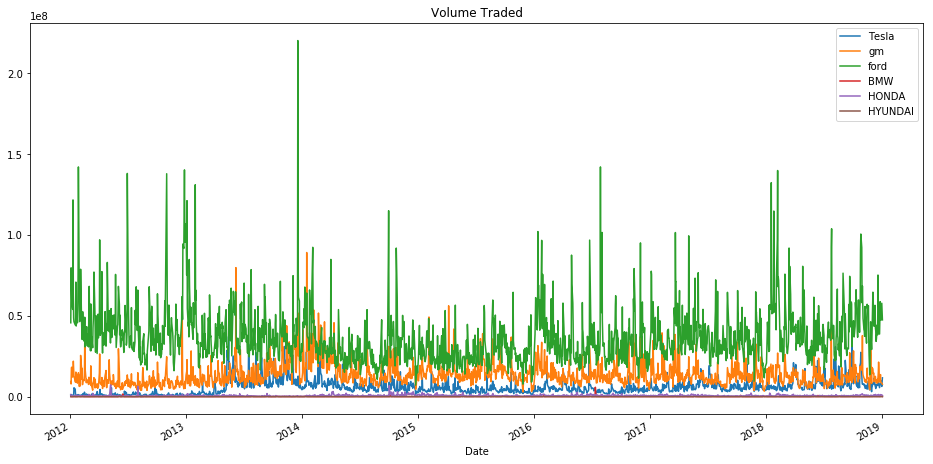

In [33]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
bmw['Volume'].plot(label='BMW')
honda['Volume'].plot(label='HONDA')
hyundai['Volume'].plot(label='HYUNDAI')
plt.legend()

In [35]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [43]:
ford['Volume'].max()

220363000.0

Calculating and analyzing total trades for each company

In [39]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
bmw['Total Traded'] = bmw['Open']*bmw['Volume']
honda['Total Traded'] = honda['Open']*honda['Volume']
hyundai['Total Traded'] = hyundai['Open']*hyundai['Volume']

Text(0, 0.5, 'Total Traded')

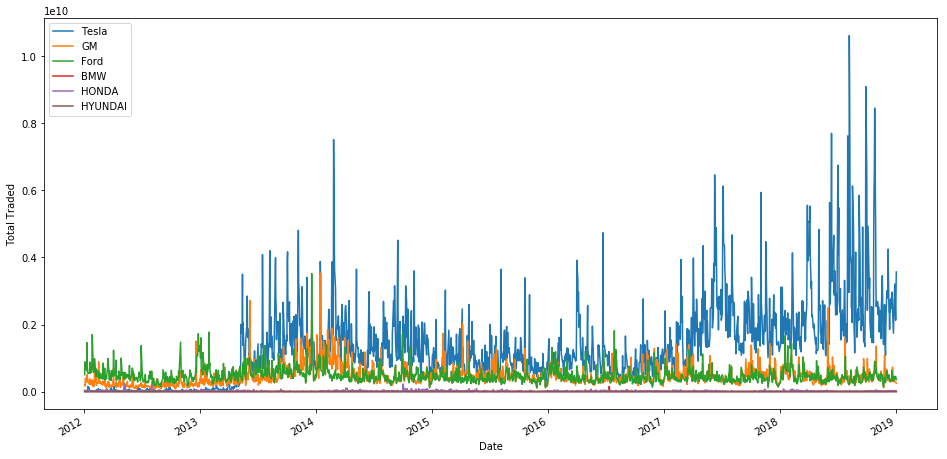

In [40]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
bmw['Total Traded'].plot(label='BMW')
honda['Total Traded'].plot(label='HONDA')
hyundai['Total Traded'].plot(label='HYUNDAI')
plt.legend()
plt.ylabel('Total Traded')

In [41]:
tesla['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

In [42]:
tesla['Total Traded'].max()

10616334958.929443

To check relation between stocks

In [44]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open'],bmw['Open'],honda['Open'],hyundai['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open','BMW Open','Honda Open','Hyundai Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open,BMW Open,Honda Open,Hyundai Open
Date,,,,,,
2012-01-03,28.940001,20.830000,11.00,23.750000,31.180000,25.250000
2012-01-04,28.209999,21.049999,11.15,24.110001,31.650000,27.799999
2012-01-05,27.760000,21.100000,11.33,24.010000,31.650000,28.350000
2012-01-06,27.200001,22.260000,11.74,23.840000,31.990000,28.500000
2012-01-09,27.000000,23.200001,11.83,24.280001,32.099998,28.750000


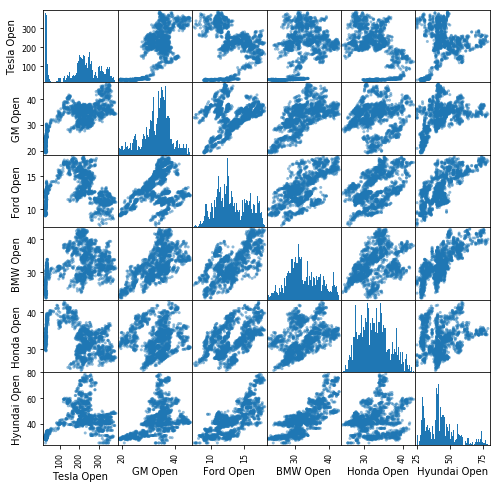

In [52]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.5,hist_kwds={'bins':100});

In [53]:
retscomp = car_comp.pct_change()

corr = retscomp.corr()

In [63]:
retscomp.head()

,Tesla Open,GM Open,Ford Open,BMW Open,Honda Open,Hyundai Open
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.025225,0.010562,0.013636,0.015158,0.015074,0.100990
2012-01-05,-0.015952,0.002375,0.016144,-0.004148,0.000000,0.019784
2012-01-06,-0.020173,0.054976,0.036187,-0.007080,0.010743,0.005291
2012-01-09,-0.007353,0.042228,0.007666,0.018456,0.003439,0.008772


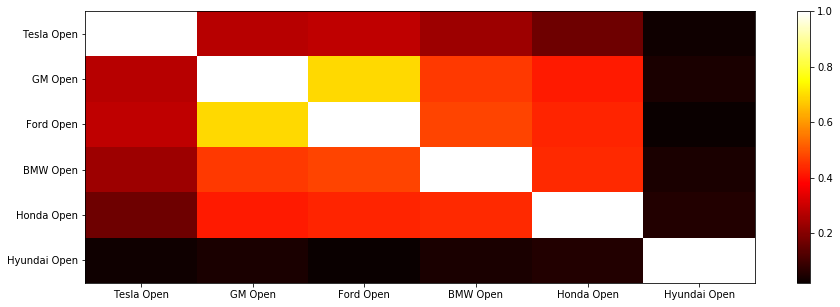

In [61]:
plt.figure(figsize = (15,5))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Financial analysis

Calculating Returns

In [62]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)
bmw['returns'] = bmw['Close'].pct_change(1)
honda['returns'] = honda['Close'].pct_change(1)
hyundai['returns'] = hyundai['Close'].pct_change(1)

In [71]:
dfcomp = pdr.DataReader(['F', 'GM', 'TSLA', 'HMC', 'BMWYY','HYMTF'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,BMWYY,F,GM,HMC,HYMTF,TSLA
Date,,,,,,
2012-01-03,17.555784,7.673051,16.474670,24.958185,19.999969,28.080000
2012-01-04,17.739580,7.790251,16.552942,25.165237,22.455410,27.709999
2012-01-05,17.673412,7.990177,17.351234,25.388224,22.574221,27.120001
2012-01-06,17.283775,8.072903,17.938215,25.587318,22.574221,26.910000
2012-01-09,17.857206,8.134951,17.875605,25.523609,22.772243,27.250000


In [80]:
retscomp = dfcomp.pct_change()
retscomp.head()

Symbols,BMWYY,F,GM,HMC,HYMTF,TSLA
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.010469,0.015274,0.004751,0.008296,0.122772,-0.013177
2012-01-05,-0.003730,0.025664,0.048227,0.008861,0.005291,-0.021292
2012-01-06,-0.022047,0.010353,0.033829,0.007842,0.000000,-0.007743
2012-01-09,0.033177,0.007686,-0.003490,-0.002490,0.008772,0.012635


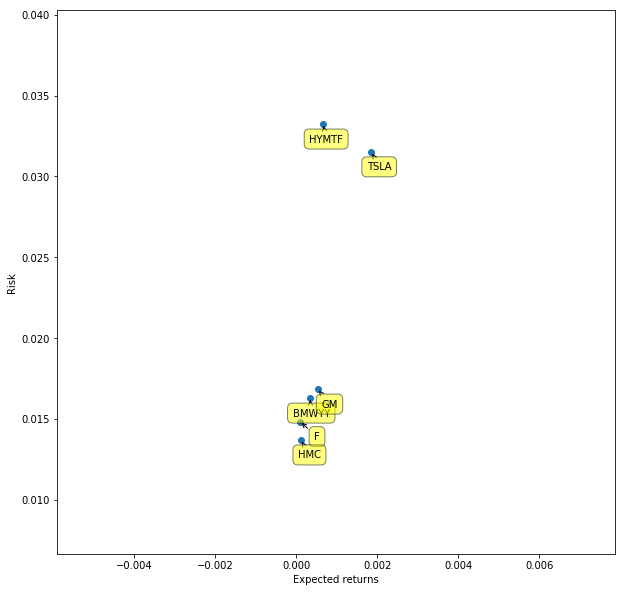

In [81]:
plt.figure(figsize = (10,10))
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Predicting Stock Prices

Linear Regression and KNN